# An Analysis of Wind Characteristics for Power Generation

<!-- Use left, center or right. Font size doesn't seem to change.-->
<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Galway-Wind-Park.jpg" width="50%">
</div>
<div style="text-align: center" font = 7> Galway Wind Park </div> 
</p>

****

## Overview

Wind plays an important part in the global move away from fossil fuels to renewables for electricity generation. Ireland in particular has a huge potential for power generation from both onshore and offshore wind which, we have only begun to exploit.  
  
According to the [SEAI](https://www.seai.ie/renewable-energy/wind-energy#:~:text=Wind%20energy%20in%20Ireland&text=It%20is%20both%20Ireland's%20largest,in%20Ireland%20after%20natural%20gas), wind is "both Ireland's largest and cheapest renewable electricity resource. In 2020 Wind provided over 86% of Ireland's renewable electricity and 36% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas."  
  
This report examines the suitablility of a selection of locations around the country for power generation from onshore wind, using data from [Met Éireann's weather stations](https://www.met.ie/climate/available-data/historical-data).

****

| Topic | Details |  
|---------|-------------|  
| **Module:**  | 4369 - Programming for Data Analytics  |  
| **Lecturer:**  | Andrew Beatty  |  
| **Course:**  | Higher Diploma in Science in Computing (Data Analytics)  |  
| **Year/Semester:**  | Year 1 / Semester 2  |  
| **Student Name:**  | David O'Connell  |  
| **Student ID:**  | G00438912  |  
| **Student Email:**  | G00438912@atu.ie  |  
   
****  

## Contents  
- Overview  
- Packages Used  
- Source Data  

Load the Data  
Inspect the Data  
Analyze the Data  
Summary and Conclusions    
References 

#### Note on internal links  
As GitHub renders this document in an iframe, internal links will not work and are not used.

## Packages Used  
This project makes use of the following packages for analysis and visualization of the wind data.
   
| Software | Version | Summary|  
|---------|-------------|---------|  
|[VS Code](https://code.visualstudio.com/) | 1.95.3 | Visual Studio Code is a lightweight but powerful source code editor which runs on your desktop. |  
|[Jupyter Notebook](https://jupyter.org/)| v2024.11.0 | VS Code extension for Jupyter Notebook support, interactive programming and computing that supports Intellisense, debugging and more. |  
<p>
<div style="text-align: center" font = 7> Table 1: Software Versions </div> 
</p>

See below for the packages used with Python.

*Note:* Extensive use has been made of the Pandas DataFrame data structure, which is similar to an Excel worksheet. Pandas provides functionality to read data from csv and other file types into the DataFrame structure, and to perform operations on the rows, columns and individual entries in that DataFrame.

In [503]:
# Import the required packages
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import datetime as dt

print("Key Package Versions")
print("--------------------")
print("Python:\t\t", platform.python_version(), "\tA programming language for system integration and data manipulation")
print("NumPy:\t\t", np.__version__, "\tAn open source project for numerical computing with Python")
print("Matplotlib:\t", mpl.__version__, "\t\tA library for static, animated and interactive visualizations in Python")
print("Pandas:\t\t", pd.__version__, "\t\tA library for data manipulation and analysis with Python")
print("Seaborn:\t", sns.__version__, "\tA Python data visualization library based on matplotlib")

Key Package Versions
--------------------
Python:		 3.11.7 	A programming language for system integration and data manipulation
NumPy:		 1.26.4 	An open source project for numerical computing with Python
Matplotlib:	 3.8.0 		A library for static, animated and interactive visualizations in Python
Pandas:		 2.1.4 		A library for data manipulation and analysis with Python
Seaborn:	 0.13.2 	A Python data visualization library based on matplotlib


## Source Data

### Weather Data
Wind speed data was retrieved from [Met Éireann's Historical Data](https://www.met.ie/climate/available-data/historical-data) site. 

Datasets are available from across the suite of [441 manual, automatic, climatological and rainfall stations](https://www.met.ie/climate/what-we-measure) - however, most of these are rainfall stations, with the 25 synoptic weather stations recording a broader set of parameters including temperature, wind speed, direction and gust strength, rainfall, humidity, pressure and general weather conditions. The manned and automatic synoptic weather stations are shown in Figure 1a) and 1b).  

<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Airports.png" width="40%">
    <img src="img/synoptic.png" width="40.65%">
</div>
<div style="text-align: center" font = 7> <b>Figure 1a)</b> Manual and <b>1b)</b> Automatic Synoptic Weather Stations </div> 
</p>  

The data at Met Éireann's Historical Data site is not available via an API, the fields must be selected manually and the resulting zip files downloaded. The data is contained in the zip file in csv format.  

### Wind Turbine Data  
Wind turbines typically start operating at wind speeds around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at around 11-14 m/s or 25-30 mph (source - [Enerpower Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)).  
  
Consistent wind behaviour is more important than the speed for producing power most efficiently and consistently. 
  
<center>  

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 2:</b> General Turbine Behaviour by Wind Speed </div> 
</p>  
  

To take a specific and local example, the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard, makes use of the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) for its wind-powered electricity generation. 58 of these turbines are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/) in 2024. This wind farm utilises 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.  
  
Performance data for the Siemens SWT-3.0-101 3MW turbine was retrieved from [here](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php). The performance can be classified as classified for various wind speeds as follows.  
  
<center>  

| Wind Speed m/s | Performance |  
|----------------|-----------------|  
| Below 4  | Unacceptable  |  
| Between 4 and 8  | Poor  |  
| Between 8 and 11  | Good  |  
| Between 11 and 25  | Optimal  |  
| Above 25  | Unacceptable  |  

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 3:</b> Siemens Turbine Performance by Wind Speed </div> 
</p>  

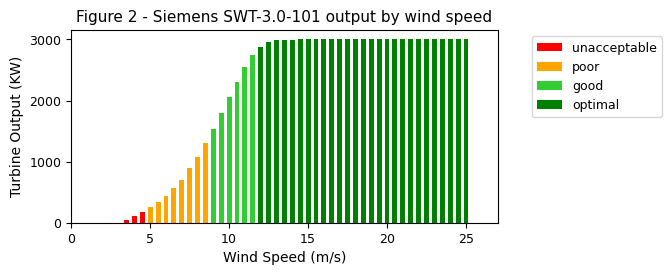

In [504]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','optimal']
colours = ['red', 'orange', 'limegreen', 'green']
colourmap = {output[0]:colours[0], output[1]:colours[1], output[2]:colours[2], output[3]:colours[3]}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Figure 2 - Siemens SWT-3.0-101 output by wind speed', fontsize=11)
axes.set_xlabel('Wind Speed (m/s)', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])
plt.show()

## Analysis - Weather Data
While there are 25 weather stations around Ireland making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), 6 were selected for the purpose of this analysis. These 6 stations are spread around the country and are located in coastal or near-coastal locations, where the wind is likely to be strongest.
  
According to the information in the header of the downloaded csv file, the primary fields we are interested in are:  
  
- date: 00 to 00 utc  
- wdsp: Mean Wind Speed (kt)  
  
and possibly...  
  
- hm: Highest ten minute mean wind speed (kt)                 
- hg: Highest Gust (kt)  
  
'kt' is the abbreviation for knot, or nautical miles per hour. The following conversions apply.  
  
<center>  

| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 4:</b> Wind Speed Unit Conversions</div> 
</p>  

### Sample Analysis - Belmullet Weather Station
As a starting point, we will look at the wind quality and consistency for the Belmullet weather station. We start by reading the previously downloaded csv file with the daily data into a dataframe, and then select the data from 1st Jan 2000 through 30th November 2024.

In [505]:
# Create a dataframe with the fields we are interested in.
belmullet_weather = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather['date']= pd.to_datetime(belmullet_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2000-01-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
belmullet_weather = belmullet_weather.loc[(belmullet_weather['date']>=date1) & (belmullet_weather['date']<=date2)]
belmullet_weather = belmullet_weather.reset_index(drop=True)

# Count and replace any missing values with NaN (the csv file contains a white space)
blank = (belmullet_weather['wdsp'] == ' ').sum()
print("Missing windspeed numbers: ", blank)
if blank != 0:
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].replace(' ',-999)
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].astype(float)
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].replace(-999,np.nan)

# Now convert to metres / second per table 4 above, to align with the turbine ratings
knots_to_metres_per_sec = 0.514
belmullet_weather['wdsp_ms']=round(belmullet_weather['wdsp']*knots_to_metres_per_sec, 2)

Missing windspeed numbers:  0


Now inspect the data. The fields that we are most interested in, 'wdsp' and 'wdsp_ms', should be floats.  
  
We also look at the first few rows and the statistics provided by the `describe` method.

In [506]:
belmullet_weather.dtypes

date       datetime64[ns]
wdsp              float64
hm                 object
hg                 object
wdsp_ms           float64
dtype: object

In [507]:
# Review the first few rows
belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms
0,2000-01-01,21.3,28,41,10.95
1,2000-01-02,20.0,47,67,10.28
2,2000-01-03,20.1,31,48,10.33


In [508]:
# Describe the data set
belmullet_weather.describe()

,date,wdsp,wdsp_ms
count,9101,9101.000000,9101.000000
mean,2012-06-16 00:00:00,11.869454,6.100877
min,2000-01-01 00:00:00,0.000000,0.000000
25%,2006-03-25 00:00:00,7.700000,3.960000
50%,2012-06-16 00:00:00,11.100000,5.710000
75%,2018-09-08 00:00:00,15.300000,7.860000
max,2024-11-30 00:00:00,34.500000,17.730000
std,NaN,5.555387,2.855472


As can be seen from the summary statistics, the mean wind speed is 6.1 metres/second which falls into the 'Poor' category.  
We will plot the windspeed as a density plot to get a qualitative view of the distribution of the mean wind speed across the period in question.  

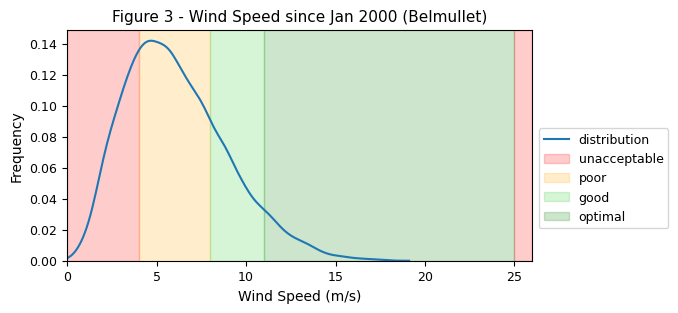

In [509]:
fig, axd = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axd = sns.kdeplot(belmullet_weather["wdsp_ms"], ax=axd)
#plt.axvline(x=4, color='red', linestyle='--')
axd.axvspan(0, 4, alpha=0.2, color=colours[0])
axd.axvspan(4, 8, alpha=0.2, color=colours[1])
axd.axvspan(8, 11, alpha=0.2, color=colours[2])
axd.axvspan(11, 25, alpha=0.2, color=colours[3])
axd.axvspan(25, 26, alpha=0.2, color=colours[0])
output1 = output.copy()
axd.set_title('Figure 3 - Wind Speed since Jan 2000 (Belmullet)', fontsize=11)
axd.set_xlabel('Wind Speed (m/s)', fontsize=10)
axd.set_ylabel('Frequency', fontsize=10)
axd.tick_params(axis='x', labelsize=9)
axd.tick_params(axis='y', labelsize=9)
axd.set_xlim(0, 26)

# Allow this cell to be run independently multiple times
if output1[0] != "distribution":
    output1.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output1, fontsize=9)
plt.show()


The plot shows that the wind speed mostly falls into the 'Unacceptable' and 'Poor' categories.  
This is surprising as Belmullet is a windy, coastal location, as the surfing attests.  
  
We will now add a column to the dataframe to categorize the wind speed as defined in Table 3 above.  
This will allow us to make a more quantitative assessment of the site.

In [510]:
# Create a new empty field called "category", then populate with the wind categorised per Table 3
belmullet_weather['category']=''
count=0
for row in belmullet_weather.itertuples():
    #print (row.wdsp_ms, end = ' ')
    if row.wdsp_ms <= 4.0:
        belmullet_weather.loc[count, 'category'] = output[0]
    elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
        belmullet_weather.loc[count, 'category'] = output[1]
    elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
        belmullet_weather.loc[count, 'category'] = output[2]
    elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
        belmullet_weather.loc[count, 'category'] = output[3]
    else:
        belmullet_weather.loc[count, 'category'] = output[0]
    count += 1

belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms,category
0,2000-01-01,21.3,28,41,10.95,good
1,2000-01-02,20.0,47,67,10.28,good
2,2000-01-03,20.1,31,48,10.33,good


We now summarise the counts for plotting.

In [511]:
# Summarize the counts - value_counts() creates a new Series
summary = belmullet_weather['category'].value_counts()
print(summary)

category
poor            4641
unacceptable    2307
good            1595
optimal          558
Name: count, dtype: int64


We now plot the counts for a quantitative view - a pie chart or bar chart would be appropriate visualisations, making sure to use the same colour coding for the categories.

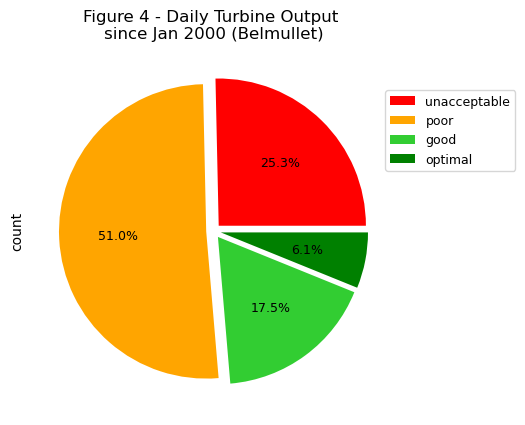

In [512]:
exp=[0.05, 0.05, 0.05, 0.05]
# Create a new index based on the categories to guarantee they get ordered correctly
summary = summary.reindex(output)
summary.plot.pie(ylabel=None,labels=None,title='Figure 4 - Daily Turbine Output \nsince Jan 2000 (Belmullet)',autopct='%1.1f%%',
                 colors=[colourmap[key] for key in summary.index], fontsize=9, explode=exp)
# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(0.95, 0.9), loc='upper left',labels=summary.index, fontsize=9)
plt.subplots_adjust(right=0.7, top=0.9)

Figure 4 confirms that Belmullet is not a particularly suitable location for a wind farm. We will next look at a total of 6 weather stations from around the country. We will limit the start date to March 2010, as we have data from all 6 stations for this window.  
  
The first step is to read in the data from each csv file, inspect and normalise it. As the same operations will need to be done for each set of station data, the common steps are contained in the function `clean_data()`. The data we are interested in for each station is then copied into a common dataframe with a separate column for each station.

In [513]:
# Function to clean up missing data and return the same number of entries from each dataset
def clean_data(df):
    #pd.options.mode.copy_on_write = True
    temp_df=df
    temp_df['date']= pd.to_datetime(temp_df['date'], format='%d-%b-%Y')
    date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
    date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
    temp_df = temp_df.loc[(temp_df['date']>=date1) & (temp_df['date']<=date2)]
    temp_df = temp_df.reset_index(drop=True)
    temp_df['wdsp'] = temp_df['wdsp'].replace(' ',-999)
    temp_df['wdsp'] = temp_df['wdsp'].astype(float)
    temp_df['wdsp'] = temp_df['wdsp'].replace(-999,np.nan)
    temp_df['wdsp_ms']=round(temp_df['wdsp']*knots_to_metres_per_sec, 2)
    return temp_df

# copy in the data for each of the selected stations, then normalise it 
weather_belmullet = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_belmullet = clean_data(weather_belmullet)

weather_macehead = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_macehead = clean_data(weather_macehead)

weather_dunsany = pd.read_csv("data/dly1375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_dunsany = clean_data(weather_dunsany)

weather_malinhead = pd.read_csv("data/dly1575.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_malinhead = clean_data(weather_malinhead)

weather_johnstown = pd.read_csv("data/dly1775.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_johnstown = clean_data(weather_johnstown)

weather_valentia = pd.read_csv("data/dly2275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_valentia = clean_data(weather_valentia)

# Now create a combined dataframe with the windspeed column from each of the individual files
weather_all = weather_belmullet.copy()
weather_all.drop(columns=['wdsp'], inplace=True)
weather_all.rename(columns={'wdsp_ms': 'wdspms_belmullet'}, inplace=True)

weather_all['wdspms_dunsany'] = weather_dunsany['wdsp_ms']
weather_all['wdspms_johnstown'] = weather_johnstown['wdsp_ms']
weather_all['wdspms_macehead'] = weather_macehead['wdsp_ms']
weather_all['wdspms_malinhead'] = weather_malinhead['wdsp_ms']
weather_all['wdspms_valentia'] = weather_valentia['wdsp_ms']

Inspect the combined dataframe to confirm that it contains the date column and a column with the wind speed in metres/second for each station.

In [514]:
weather_all.head(5)


,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54


Now create a density plot for each of the weather stations, overlaid to get a qualitative view of the relative wind quality of the selected stations.  

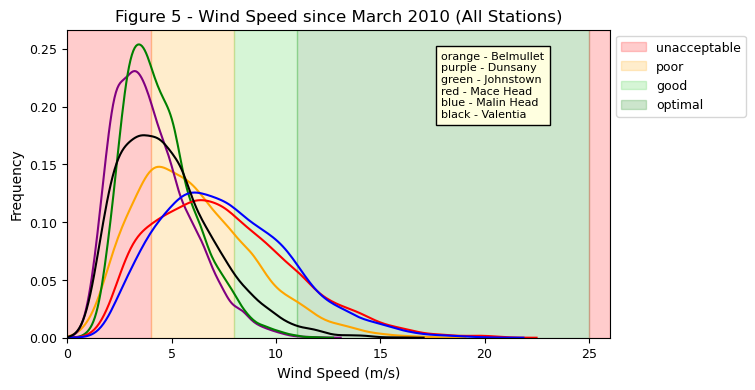

In [515]:
# Create and configure the plot
fig, ax_combined = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax_combined.axvspan(0, 4, alpha=0.2, color=colours[0])
ax_combined.axvspan(4, 8, alpha=0.2, color=colours[1])
ax_combined.axvspan(8, 11, alpha=0.2, color=colours[2])
ax_combined.axvspan(11, 25, alpha=0.2, color=colours[3])
ax_combined.axvspan(25, 26, alpha=0.2, color=colours[0])
ax_combined.set_title('Figure 5 - Wind Speed since March 2010 (All Stations)', fontsize=12)
ax_combined.set_xlabel('Wind Speed (m/s)', fontsize=10)
ax_combined.set_ylabel('Frequency', fontsize=10)
ax_combined.set_xlim(0, 26)
# Draw the individual density plots, colour coded
ax_combined = sns.kdeplot(weather_all["wdspms_belmullet"], ax=ax_combined, color='orange')
ax_combined = sns.kdeplot(weather_all["wdspms_dunsany"], ax=ax_combined, color='purple')
ax_combined = sns.kdeplot(weather_all["wdspms_johnstown"], ax=ax_combined, color='green')
ax_combined = sns.kdeplot(weather_all["wdspms_macehead"], ax=ax_combined, color='red')
ax_combined = sns.kdeplot(weather_all["wdspms_malinhead"], ax=ax_combined, color='blue')
ax_combined = sns.kdeplot(weather_all["wdspms_valentia"], ax=ax_combined, color='black')
colour_code = "orange - Belmullet\npurple - Dunsany\ngreen - Johnstown\nred - Mace Head\nblue - Malin Head\nblack - Valentia"
ax_combined.text(0.689, 0.93, colour_code, transform=ax_combined.transAxes, fontsize=8,
                 va='top', bbox=dict(facecolor='lightyellow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=output, fontsize = 9)
plt.show()

This view indicates that Mace Head or Malin Head would be the most suitable locations for a wind farm, as the distribution in the 'good' and 'optimal' categories is higher than for the other stations, and the distribution in the 'unacceptable' and 'poor' categories is lower.  
  
The next step is to categorise the wind quality for each site to create a quantitative assessment of the suitability of each station as a wind farm location. As the categorisation requires the same steps for each station, the steps are contained in the function `categorise_wind()`. 

In [516]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 

def categorise_wind(df):
    temp_df=df
    temp_df['category']=''
    count=0
    for row in temp_df.itertuples():
        if row.wdsp_ms <= 4.0:
            temp_df.loc[count, 'category'] = output[0]
        elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
            temp_df.loc[count, 'category'] = output[1]
        elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
            temp_df.loc[count, 'category'] = output[2]
        elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
            temp_df.loc[count, 'category'] = output[3]
        else:
            temp_df.loc[count, 'category'] = output[0]
        count += 1
    return temp_df

# Categorise the wind quality for each station
weather_belmullet = categorise_wind(weather_belmullet)
weather_dunsany = categorise_wind(weather_dunsany)
weather_johnstown = categorise_wind(weather_johnstown)
weather_macehead = categorise_wind(weather_macehead)
weather_malinhead = categorise_wind(weather_malinhead)
weather_valentia = categorise_wind(weather_valentia)

# Create a single dataframe with a column for each with the categorised wind quality
weather_all['category_belmullet'] = weather_belmullet['category']
weather_all['category_dunsany'] = weather_dunsany['category']
weather_all['category_johnstown'] = weather_johnstown['category']
weather_all['category_macehead'] = weather_macehead['category']
weather_all['category_malinhead'] = weather_malinhead['category']
weather_all['category_valentia'] = weather_valentia['category']

# Create a summary of the counts of the various wind categories for each station
summary_belmullet = weather_belmullet['category'].value_counts().reindex(output)
summary_dunsany = weather_dunsany['category'].value_counts().reindex(output)
summary_johnstown = weather_johnstown['category'].value_counts().reindex(output)
summary_macehead = weather_macehead['category'].value_counts().reindex(output)
summary_malinhead = weather_malinhead['category'].value_counts().reindex(output)
summary_valentia = weather_valentia['category'].value_counts().reindex(output)

# Finally, combine these summaries into a single dataframe
summary_all = summary_belmullet.copy()
summary_all = summary_all.to_frame('count_belmullet')
summary_all['count_dunsany'] = summary_dunsany.to_frame('count_dunsany')
summary_all['count_johnstown'] = summary_johnstown.to_frame('count_johnstown')
summary_all['count_macehead'] = summary_macehead.to_frame('count_macehead')
summary_all['count_malinhead'] = summary_malinhead.to_frame('count_malinhead')
summary_all['count_valentia'] = summary_valentia.to_frame('count_valentia')

Inspect the dataframe to confirm that it contains the columns for each station as expected.

In [517]:
summary_all.head(6)

,count_belmullet,count_dunsany,count_johnstown,count_macehead,count_malinhead,count_valentia
category,,,,,,
unacceptable,1384,2964,2462,811,638,2222
poor,2781,2246,2722,2461,2535,2629
good,925,175,202,1328,1495,455
optimal,299,4,3,789,721,83


We now plot the counts for a quantitative view - a pie chart or bar chart would be appropriate visualisations, making sure to use the same colour coding for the categories.

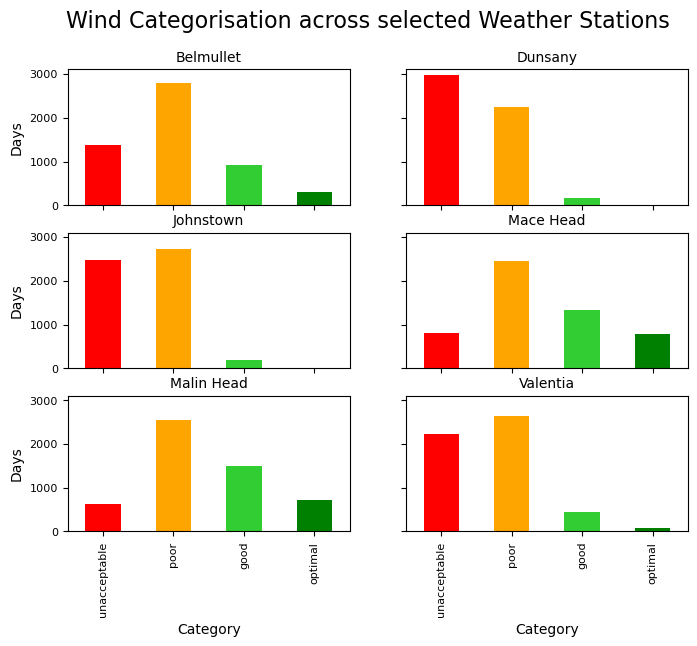

In [518]:
fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex='col', sharey='row')
fig_all.suptitle('Wind Categorisation across selected Weather Stations', fontsize=16)
summary_all.get('count_belmullet').plot.bar(ax=ax_all[0,0],color=[colourmap[key] for key in summary_all.index])

ax_all[0,0].set_title('Belmullet', fontsize=10)
ax_all[0,0].set_ylabel('Days', fontsize=10)
ax_all[0,0].tick_params(axis='y', labelsize=8)
ax_all[0,0].set_ylim(0, 3100)

summary_all.get('count_dunsany').plot.bar(ax=ax_all[0,1],color=[colourmap[key] for key in summary_all.index])
ax_all[0,1].set_title('Dunsany', fontsize=10)

summary_all.get('count_johnstown').plot.bar(ax=ax_all[1,0],color=[colourmap[key] for key in summary_all.index])
ax_all[1,0].set_title('Johnstown', fontsize=10)
ax_all[1,0].set_ylabel('Days', fontsize=10)
ax_all[1,0].tick_params(axis='y', labelsize=8)
ax_all[1,0].set_ylim(0, 3100)

summary_all.get('count_macehead').plot.bar(ax=ax_all[1,1],color=[colourmap[key] for key in summary_all.index])
ax_all[1,1].set_title('Mace Head', fontsize=10)

summary_all.get('count_malinhead').plot.bar(ax=ax_all[2,0],color=[colourmap[key] for key in summary_all.index])
ax_all[2,0].set_title('Malin Head', fontsize=10)
ax_all[2,0].set_ylabel('Days', fontsize=10)
ax_all[2,0].tick_params(axis='x', labelsize=8)
ax_all[2,0].tick_params(axis='y', labelsize=8)
ax_all[2,0].set_xlabel('Category', fontsize=10)
ax_all[2,0].set_ylim(0, 3100)

summary_all.get('count_valentia').plot.bar(ax=ax_all[2,1],color=[colourmap[key] for key in summary_all.index])
ax_all[2,1].set_title('Valentia', fontsize=10)
ax_all[2,1].set_xlabel('Category', fontsize=10)
ax_all[2,1].tick_params(axis='x', labelsize=8)

plt.show()

## Forward View
In this section, we will extrapolate the 1 month mean line to see if the  wind is going to 

[Datacamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python) was used as a refresher on calculating best fit coefficients, particularly where the x-axis is a date.

The following code block contains a function which is used to clean up the monthly data and calculate the best fit coefficients for a best fit line. It is called for each of the 6 weather stations.  
  
The best fit line provides an insight into whether the monthly mean wind is trending up or down over the last 2 decades (in some cases there is less than 2 decades of data available, so the avalable data is plotted.)

In [520]:
# Create a function for the common actions that will be repeated for each weather station

def calc_best_fit(mean_wind):

    # Count and replace any missing values with NaN (the csv file contains a white space)
    white_space = (mean_wind['wdsp'] == ' ').sum()
    print("Missing windspeed numbers: ", white_space)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(' ',-999)
    mean_wind['wdsp'] = mean_wind['wdsp'].astype(float)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(-999,np.nan)

    # Convert from knots to m/s
    mean_wind['wdsp']=round(mean_wind['wdsp']*knots_to_metres_per_sec, 2)

    # Consolidate the year and month fields into a datetime yyyy-mm format
    mean_wind['date'] = mean_wind['year'].astype(str) + '-' + mean_wind['month'].astype(str)
    mean_wind['date']= pd.to_datetime(mean_wind['date'], format='%Y-%m').dt.to_period('m')
    mean_wind['datestr'] = mean_wind['date'].astype(str)
    mean_wind['datenum'] = mdates.date2num(mean_wind['date'])

    # Now select the range we are interested in - the last 20 years
    date1 = '2005-01'
    date2 = '2024-11'
    mean_wind = mean_wind.loc[(mean_wind['date']>=date1) & (mean_wind['date']<=date2)]
    mean_wind = mean_wind.reset_index(drop=True)

    # Finally calculate the 1st order best fit line, taking care not to pass NaN values
    idx = np.isfinite(mean_wind['datenum']) & np.isfinite(mean_wind['wdsp'])
    m, c = np.polyfit(mean_wind['datenum'][idx], mean_wind['wdsp'][idx], 1)
    print("m =",m,"c =",c)

    return m, c, mean_wind

check if this data already exists in a database table. If so, use it from there.
If not, read it from the csv files and create the table.

In [521]:
import sqlite3

# Creates a database if it doesn't exist

try:
    with sqlite3.connect("wind") as conn:
        print("Opened SQLite database")
        cursor = conn.cursor()
        sql = "create table if not exists belmullet (year INT, month INT, windspeed FLOAT64)"
        cursor.execute(sql)
        conn.commit()
#ELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';
# that is, the cursor will have a count of 0 (does not exist) or a count of 1 (does exist)

except sqlite3.OperationalError as e:
    print("Failed to open database:", e)

conn.close()


Opened SQLite database


In [522]:
with sqlite3.connect("wind") as conn:
    print("Connected to SQLite database")
    cursor = conn.cursor()
    sql = "show tables"
    cursor.execute(sql)
conn.close()

Connected to SQLite database


OperationalError: near "show": syntax error

In [524]:
# Create a dataframe for each weather station with the fields we are interested in

belmullet_mean_wind = pd.read_csv("data/mly2375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("Belmullet:")
m1, c1, belmullet_mean_wind = calc_best_fit(belmullet_mean_wind)

dunsany_mean_wind = pd.read_csv("data/mly1375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nDunsany:")
m2, c2, dunsany_mean_wind = calc_best_fit(dunsany_mean_wind)

johnstown_mean_wind = pd.read_csv("data/mly1775.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nJohnstown Castle:")
m3, c3, johnstown_mean_wind = calc_best_fit(johnstown_mean_wind)

macehead_mean_wind = pd.read_csv("data/mly275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMace Head:")
m4, c4, macehead_mean_wind = calc_best_fit(macehead_mean_wind)

malinhead_mean_wind = pd.read_csv("data/mly1575.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMalin Head:")
m5, c5, malinhead_mean_wind = calc_best_fit(malinhead_mean_wind)

valentia_mean_wind = pd.read_csv("data/mly2275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nValentia Island:")
m6, c6, valentia_mean_wind = calc_best_fit(valentia_mean_wind)


Belmullet:
Missing windspeed numbers:  0
m = 2.684861328079356e-05 c = 5.575142579168166

Dunsany:
Missing windspeed numbers:  0
m = -1.3142094030997162e-05 c = 4.294653081086979

Johnstown Castle:
Missing windspeed numbers:  3
m = 5.7140520178660175e-05 c = 3.384087643177611

Mace Head:
Missing windspeed numbers:  2
m = 4.370508953987027e-05 c = 6.692565415082731

Malin Head:
Missing windspeed numbers:  1
m = 2.6582884780488225e-05 c = 7.082986025297201

Valentia Island:
Missing windspeed numbers:  2
m = 3.543320265168775e-05 c = 4.203132440032189


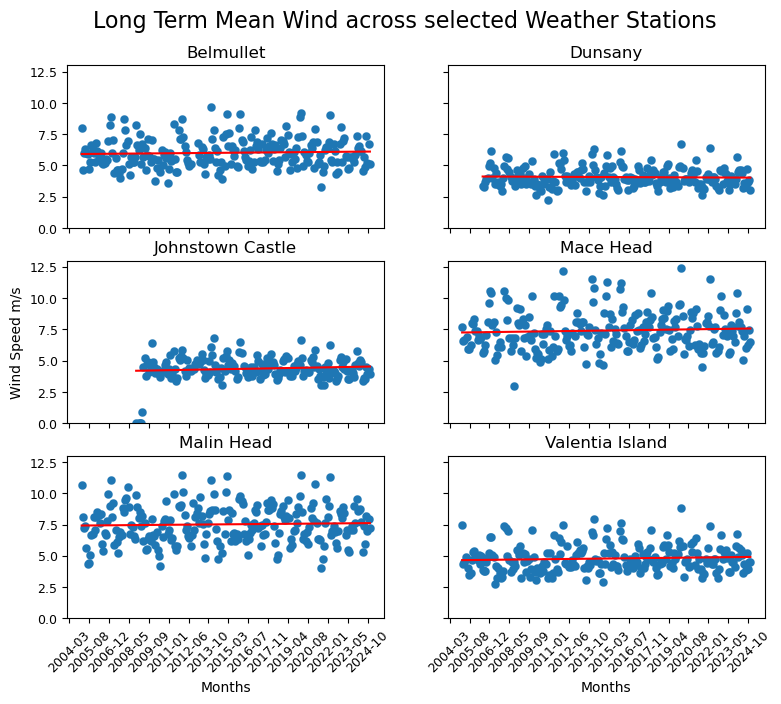

In [525]:
fig_mean, axes_mean = plt.subplots(nrows=3, ncols=2, figsize=(9, 7), sharex='col', sharey='row')
fig_mean.suptitle('Long Term Mean Wind across selected Weather Stations', fontsize=16)
fig_mean.subplots_adjust(top = 0.9)
date_form = mdates.DateFormatter("%Y-%m")

axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['datenum']*m1 + c1, 'r-')
axes_mean[0,0].set_title('Belmullet', fontsize=12)
axes_mean[0,0].tick_params(axis='y', labelsize=9)
axes_mean[0,0].set_ylim(0, 13)

axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['datenum']*m2 + c2, 'r-')
axes_mean[0,1].set_title('Dunsany', fontsize=12)

axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['datenum']*m3 + c3, 'r-')
axes_mean[1,0].set_title('Johnstown Castle', fontsize=12)
axes_mean[1,0].tick_params(axis='y', labelsize=9)
axes_mean[1,0].set_ylabel('Wind Speed m/s', fontsize=10)
axes_mean[1,0].set_ylim(0, 13)

axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['datenum']*m4 + c4, 'r-')
axes_mean[1,1].set_title('Mace Head', fontsize=12)

axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['datenum']*m5 + c5, 'r-')
axes_mean[2,0].set_title('Malin Head', fontsize=12)
axes_mean[2,0].xaxis.set_major_formatter(date_form)
axes_mean[2,0].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,0].tick_params(axis='y', labelsize=9)
axes_mean[2,0].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,0].set_xlabel('Months', fontsize=10)

axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['datenum']*m6 + c6, 'r-')
axes_mean[2,1].set_title('Valentia Island', fontsize=12)
axes_mean[2,1].xaxis.set_major_formatter(date_form)
axes_mean[2,1].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,1].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,1].set_xlabel('Months', fontsize=10)
axes_mean[2,0].set_ylim(0, 13)

plt.show()

In [ ]:
# Now copy in the last 3 years and ewxtrapolate the 1 month rolling mean mean for 10 years.

## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park

https://stackoverflow.com/questions/69335720/overlay-shaded-regions-on-a-line-plot-based-on-conditions
